In [1]:
import joblib
from sklearn.model_selection import RandomizedSearchCV
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from RF_Model_Functions import *
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
from scipy.signal import savgol_filter
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

C:\Users\smgls\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
from_one_hot_dict = {(1.,0.,0.,0.) : 0, (0.,1.,0.,0.) : 1, (0.,0.,1.,0.) : 2, (0.,0.,0.,1.) : 3}
from_one_hot_dict_materials = {(1.,0.,0.) : 0, (0.,1.,0.) : 1, (0.,0.,1.) : 2}

In [8]:
spectra_train = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/y_new_train.joblib')
spectra_test = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/y_test.joblib')
labels_train = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/x_new_train.joblib').reset_index()
labels_test = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/x_test.joblib').reset_index()
labels_train_smaller = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/x_train.joblib').reset_index()
spectra_train_smaller = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/y_train.joblib')

In [9]:
labels_train_Au = drop_indicies(labels_train, 'Material_Au', 0, False)[0]
labels_test_Au = drop_indicies(labels_test, 'Material_Au', 0, False)[0]

In [10]:
labels_train_Au = labels_train_Au.reset_index()
labels_test_Au = labels_test_Au.reset_index()

In [11]:
labels_train_Au_sphere = drop_indicies(labels_train_Au, 'Geometry_sphere', 0, False)[0].drop(columns = ['level_0'])
labels_test_Au_sphere = drop_indicies(labels_test_Au, 'Geometry_sphere', 0, False)[0].drop(columns = ['level_0'])

In [12]:
labels_train_Au_sphere = labels_train_Au_sphere.reset_index()
labels_test_Au_sphere = labels_test_Au_sphere.reset_index()

In [13]:
labels_test_Au_sphere = labels_test_Au_sphere.drop(columns = ['level_0'])
labels_train_Au_sphere = labels_train_Au_sphere.drop(columns = ['level_0'])

In [10]:
labels_test_Au_sphere

,index,Geometry_TriangPrismIsosc,Geometry_parallelepiped,Geometry_sphere,Geometry_wire,Material_Au,Material_SiN,Material_SiO2,log Area/Vol,ShortestDim,MiddleDim,LongDim
0,27116,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.476567,0.185480,0.185480,0.185480
1,27087,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.142358,0.259085,0.259085,0.259085
2,27045,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.658331,0.420390,0.420390,0.420390
3,26854,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.457161,3.798469,3.798469,3.798469
4,27057,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.796625,0.366094,0.366094,0.366094
...,...,...,...,...,...,...,...,...,...,...,...,...
199,26874,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.687650,3.016536,3.016536,3.016536
200,26963,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.713326,1.081591,1.081591,1.081591
201,27000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.139731,0.706119,0.706119,0.706119
202,27111,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.418945,0.196482,0.196482,0.196482


In [14]:
spectra_train_df = pd.DataFrame(spectra_train)
spectra_test_df = pd.DataFrame(spectra_test)

In [15]:
spectra_test_df_Au = spectra_test_df.drop(drop_indicies(labels_test, 'Material_Au', 0, False)[1])
spectra_train_df_Au = spectra_train_df.drop(drop_indicies(labels_train, 'Material_Au', 0, False)[1])
spectra_test_df_Au = spectra_test_df_Au.reset_index()
spectra_train_df_Au = spectra_train_df_Au.reset_index()

In [16]:
spectra_train_df_Au.drop(columns = ['index'], inplace = True)
spectra_test_df_Au.drop(columns = ['index'], inplace = True)

In [17]:
spectra_test_df_Au.drop(drop_indicies(labels_test_Au, 'Geometry_sphere', 0, False)[1], inplace = True)
spectra_train_df_Au.drop(drop_indicies(labels_train_Au, 'Geometry_sphere', 0, False)[1], inplace = True)

In [18]:
spectra_test_df_Au.reset_index(inplace = True)
spectra_train_df_Au.reset_index(inplace = True)

In [19]:
spectra_test_df_Au_sphere = spectra_test_df_Au.drop(columns = ["index"])
spectra_train_df_Au_sphere = spectra_train_df_Au.drop(columns = ["index"])

In [20]:
spectra_train_df_Au_sphere

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.001405,0.001426,0.001447,0.001468,0.001489,0.001510,0.001532,0.001554,0.001576,0.001598,...,0.005444,0.005458,0.005472,0.005486,0.005501,0.005516,0.005532,0.005548,0.005565,0.005582
1,0.004633,0.004656,0.004679,0.004703,0.004727,0.004751,0.004775,0.004800,0.004825,0.004849,...,0.015394,0.015336,0.015271,0.015199,0.015121,0.015038,0.014950,0.014858,0.014762,0.014663
2,0.000301,0.000306,0.000312,0.000318,0.000324,0.000329,0.000335,0.000341,0.000347,0.000353,...,0.002582,0.002589,0.002596,0.002604,0.002611,0.002619,0.002627,0.002635,0.002643,0.002652
3,0.004771,0.004794,0.004817,0.004841,0.004865,0.004889,0.004913,0.004938,0.004963,0.004987,...,0.013954,0.013853,0.013754,0.013657,0.013562,0.013471,0.013384,0.013300,0.013222,0.013148
4,0.005307,0.005330,0.005354,0.005378,0.005402,0.005426,0.005450,0.005475,0.005500,0.005525,...,0.010298,0.010295,0.010293,0.010291,0.010287,0.010282,0.010275,0.010264,0.010250,0.010235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13378,0.004922,0.004945,0.004968,0.004992,0.005016,0.005040,0.005065,0.005089,0.005114,0.005139,...,0.012517,0.012523,0.012535,0.012550,0.012569,0.012590,0.012614,0.012638,0.012664,0.012688
13379,0.000095,0.000097,0.000099,0.000101,0.000103,0.000105,0.000107,0.000109,0.000111,0.000113,...,0.001259,0.001263,0.001267,0.001271,0.001275,0.001279,0.001283,0.001287,0.001292,0.001296
13380,0.002070,0.002095,0.002120,0.002146,0.002172,0.002198,0.002224,0.002251,0.002278,0.002305,...,0.006321,0.006340,0.006359,0.006378,0.006398,0.006419,0.006440,0.006462,0.006484,0.006507
13381,0.004632,0.004655,0.004678,0.004702,0.004726,0.004750,0.004775,0.004799,0.004824,0.004849,...,0.015370,0.015309,0.015241,0.015166,0.015085,0.014998,0.014906,0.014810,0.014711,0.014608


In [21]:
labels_train_Au_sphere

,index,Geometry_TriangPrismIsosc,Geometry_parallelepiped,Geometry_sphere,Geometry_wire,Material_Au,Material_SiN,Material_SiO2,log Area/Vol,ShortestDim,MiddleDim,LongDim
0,13,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.436075,0.193145,0.193145,0.193145
1,24,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.916779,0.882479,0.882479,0.882479
2,27,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.087434,0.100693,0.100693,0.100693
3,31,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.751333,1.041255,1.041255,1.041255
4,37,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.469922,3.750307,3.750307,3.750307
...,...,...,...,...,...,...,...,...,...,...,...,...
13378,26945,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.505886,1.330924,1.330924,1.330924
13379,27199,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.433097,0.071266,0.071266,0.071266
13380,27094,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.223029,0.239005,0.239005,0.239005
13381,26980,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.909242,0.889156,0.889156,0.889156


In [22]:
RF_Au_Sphere = Train_Random_Forests_Size_Regression("all", spectra_train_df_Au_sphere, labels_train_Au_sphere, spectra_test_df_Au_sphere, labels_test_Au_sphere, 50)

In [23]:
RF_Au_Sphere[0]

0.9998946585394746

In [24]:
len(spectra_train_df_Au_sphere.columns)

400

In [25]:
mix_list = []
for row in range(0, len(spectra_train_df_Au_sphere.index)-1):
    new_row = spectra_train_df_Au_sphere.loc[row]*0.5 + spectra_train_df_Au_sphere.loc[row+1]*0.5
    mix_list.append(new_row)
    


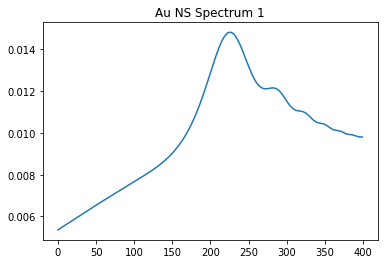

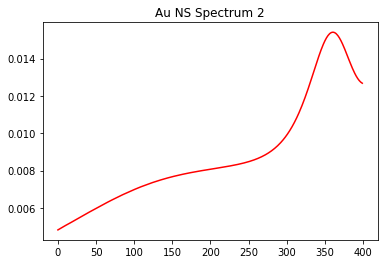

Text(0.5, 1.0, 'Unknown Spectrum')

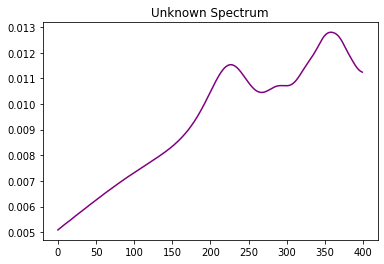

In [47]:
plt.plot(spectra_train_df_Au_sphere.loc[69])
plt.title("Au NS Spectrum 1")
plt.show()
plt.plot(spectra_train_df_Au_sphere.loc[70], color = 'r')
plt.title("Au NS Spectrum 2")
plt.show()
plt.plot((spectra_train_df_Au_sphere.loc[70]*0.5 + spectra_train_df_Au_sphere.loc[69]*0.5), color = 'purple')
plt.title("Unknown Spectrum")

In [21]:
mix_list_test = []
for row in range(0, len(spectra_test_df_Au_sphere.index)-1):
    new_row = spectra_test_df_Au_sphere.loc[row]*0.5 + spectra_test_df_Au_sphere.loc[row+1]*0.5
    mix_list_test.append(new_row)

In [22]:
mixed_spectra_train_df = pd.DataFrame(mix_list)

In [23]:
mixed_spectra_train_df

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.003019,0.003041,0.003063,0.003085,0.003108,0.003131,0.003154,0.003177,0.003200,0.003224,...,0.010419,0.010397,0.010371,0.010343,0.010311,0.010277,0.010241,0.010203,0.010163,0.010122
1,0.002467,0.002481,0.002496,0.002510,0.002525,0.002540,0.002555,0.002571,0.002586,0.002601,...,0.008988,0.008963,0.008934,0.008901,0.008866,0.008829,0.008788,0.008746,0.008702,0.008657
2,0.002536,0.002550,0.002565,0.002579,0.002594,0.002609,0.002624,0.002640,0.002655,0.002670,...,0.008268,0.008221,0.008175,0.008130,0.008087,0.008045,0.008005,0.007968,0.007932,0.007900
3,0.005039,0.005062,0.005086,0.005109,0.005133,0.005157,0.005182,0.005207,0.005232,0.005256,...,0.012126,0.012074,0.012023,0.011974,0.011925,0.011877,0.011829,0.011782,0.011736,0.011691
4,0.005239,0.005262,0.005285,0.005309,0.005333,0.005357,0.005381,0.005406,0.005431,0.005455,...,0.010852,0.010851,0.010851,0.010851,0.010848,0.010844,0.010836,0.010824,0.010810,0.010792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13377,0.005124,0.005147,0.005171,0.005194,0.005218,0.005243,0.005267,0.005292,0.005317,0.005342,...,0.011316,0.011310,0.011307,0.011307,0.011310,0.011317,0.011326,0.011337,0.011349,0.011361
13378,0.002509,0.002521,0.002534,0.002547,0.002560,0.002573,0.002586,0.002599,0.002613,0.002626,...,0.006888,0.006893,0.006901,0.006910,0.006922,0.006934,0.006948,0.006963,0.006978,0.006992
13379,0.001083,0.001096,0.001110,0.001124,0.001137,0.001152,0.001166,0.001180,0.001195,0.001209,...,0.003790,0.003801,0.003813,0.003824,0.003836,0.003849,0.003861,0.003875,0.003888,0.003902
13380,0.003351,0.003375,0.003399,0.003424,0.003449,0.003474,0.003500,0.003525,0.003551,0.003577,...,0.010846,0.010824,0.010800,0.010772,0.010741,0.010708,0.010673,0.010636,0.010597,0.010558


In [24]:
mixed_spectra_test_df = pd.DataFrame(mix_list_test)
mixed_spectra_test_df

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.001805,0.001827,0.001850,0.001873,0.001896,0.001920,0.001944,0.001968,0.001992,0.002016,...,0.005936,0.005953,0.005970,0.005987,0.006006,0.006024,0.006044,0.006064,0.006084,0.006105
1,0.003003,0.003028,0.003053,0.003078,0.003103,0.003129,0.003155,0.003181,0.003207,0.003233,...,0.007943,0.007989,0.008036,0.008085,0.008136,0.008188,0.008242,0.008298,0.008355,0.008415
2,0.004483,0.004506,0.004529,0.004553,0.004577,0.004602,0.004626,0.004651,0.004676,0.004701,...,0.009746,0.009781,0.009816,0.009852,0.009888,0.009924,0.009960,0.009995,0.010031,0.010067
3,0.004337,0.004360,0.004384,0.004408,0.004433,0.004458,0.004483,0.004508,0.004534,0.004559,...,0.009304,0.009327,0.009352,0.009376,0.009400,0.009424,0.009447,0.009469,0.009492,0.009514
4,0.004349,0.004373,0.004397,0.004421,0.004446,0.004471,0.004496,0.004521,0.004547,0.004572,...,0.009196,0.009213,0.009233,0.009254,0.009279,0.009305,0.009334,0.009363,0.009393,0.009423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0.004268,0.004291,0.004315,0.004340,0.004364,0.004389,0.004414,0.004440,0.004466,0.004490,...,0.009425,0.009447,0.009470,0.009493,0.009515,0.009537,0.009557,0.009576,0.009594,0.009612
199,0.005019,0.005042,0.005065,0.005089,0.005113,0.005137,0.005162,0.005186,0.005212,0.005236,...,0.012139,0.012090,0.012044,0.011998,0.011953,0.011909,0.011866,0.011823,0.011782,0.011742
200,0.004596,0.004620,0.004643,0.004667,0.004691,0.004715,0.004739,0.004764,0.004789,0.004813,...,0.014199,0.014209,0.014218,0.014225,0.014232,0.014238,0.014242,0.014246,0.014248,0.014249
201,0.002918,0.002940,0.002962,0.002985,0.003007,0.003031,0.003054,0.003077,0.003101,0.003125,...,0.010147,0.010212,0.010274,0.010333,0.010389,0.010442,0.010492,0.010537,0.010579,0.010616


In [25]:
labels_test = np.ones(203)
labels_test = np.append(labels_test, np.zeros(204))
labels_test_df = pd.DataFrame(labels_test, columns = ["Mixture"])

In [26]:
labels_train = np.ones(13382)
labels_train = np.append(labels_train, np.zeros(13383))
labels_train_df = pd.DataFrame(labels_train, columns = ["Mixture"])

In [27]:
spectra_test_mixture = mixed_spectra_test_df.append(spectra_test_df_Au_sphere)

In [28]:
spectra_test_mixture.reset_index(inplace = True)

In [29]:
spectra_test_mixture.drop(columns = ['index'], inplace = True)

In [30]:
spectra_test_mixture

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.001805,0.001827,0.001850,0.001873,0.001896,0.001920,0.001944,0.001968,0.001992,0.002016,...,0.005936,0.005953,0.005970,0.005987,0.006006,0.006024,0.006044,0.006064,0.006084,0.006105
1,0.003003,0.003028,0.003053,0.003078,0.003103,0.003129,0.003155,0.003181,0.003207,0.003233,...,0.007943,0.007989,0.008036,0.008085,0.008136,0.008188,0.008242,0.008298,0.008355,0.008415
2,0.004483,0.004506,0.004529,0.004553,0.004577,0.004602,0.004626,0.004651,0.004676,0.004701,...,0.009746,0.009781,0.009816,0.009852,0.009888,0.009924,0.009960,0.009995,0.010031,0.010067
3,0.004337,0.004360,0.004384,0.004408,0.004433,0.004458,0.004483,0.004508,0.004534,0.004559,...,0.009304,0.009327,0.009352,0.009376,0.009400,0.009424,0.009447,0.009469,0.009492,0.009514
4,0.004349,0.004373,0.004397,0.004421,0.004446,0.004471,0.004496,0.004521,0.004547,0.004572,...,0.009196,0.009213,0.009233,0.009254,0.009279,0.009305,0.009334,0.009363,0.009393,0.009423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.005250,0.005273,0.005297,0.005320,0.005345,0.005369,0.005393,0.005418,0.005443,0.005468,...,0.010712,0.010712,0.010712,0.010710,0.010705,0.010697,0.010685,0.010669,0.010649,0.010626
403,0.004787,0.004810,0.004834,0.004857,0.004881,0.004906,0.004930,0.004955,0.004980,0.005004,...,0.013565,0.013469,0.013375,0.013286,0.013201,0.013121,0.013047,0.012978,0.012915,0.012858
404,0.004406,0.004429,0.004452,0.004476,0.004500,0.004524,0.004548,0.004573,0.004598,0.004623,...,0.014833,0.014949,0.015060,0.015165,0.015263,0.015354,0.015438,0.015514,0.015581,0.015640
405,0.001430,0.001451,0.001472,0.001494,0.001515,0.001537,0.001559,0.001582,0.001604,0.001627,...,0.005462,0.005475,0.005488,0.005502,0.005516,0.005530,0.005545,0.005561,0.005576,0.005592


In [31]:
spectra_train_mixture = mixed_spectra_train_df.append(spectra_train_df_Au_sphere)

In [32]:
spectra_train_mixture.reset_index(inplace = True)

In [33]:
spectra_train_mixture.drop(columns = ['index'], inplace = True)

In [49]:
for depth in np.linspace(8,12,5):    
    rf_mixture = RandomForestClassifier(n_estimators = 50, max_features = 400, n_jobs = -1, max_depth = depth)
    rf_mixture.fit(np.asarray(spectra_train_mixture), np.ravel(labels_train_df))
    print("max depth = " + str(depth), rf_mixture.score(np.asarray(spectra_test_mixture), np.ravel(labels_test_df)))
    #predictions = rf_mixture.predict(np.asarray(spectra_test_mixture))
    #cm_mixture = confusion_matrix(np.ravel(labels_test_df), predictions)
    #cm_normalized = normalize_cm(cm_mixture, list(np.ravel(labels_test_df)), 2)
    #plot_confusion_matrix(np.asarray(cm_normalized), ["not mixture", "mixture"])

max depth = 8.0 0.8574938574938575
max depth = 9.0 0.8697788697788698
max depth = 10.0 0.8648648648648649
max depth = 11.0 0.8624078624078624
max depth = 12.0 0.8574938574938575


0.9066339066339066
Confusion matrix, without normalization
[[0.91 0.09]
 [0.09 0.91]]


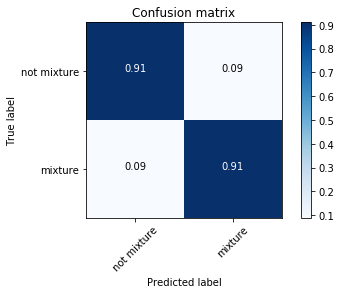

In [36]:
rf_mixture = RandomForestClassifier(n_estimators = 100, max_features = 20, n_jobs = -1, max_depth = 10, min_samples_leaf = 2, 
                                   bootstrap = True)
rf_mixture.fit(np.asarray(spectra_train_mixture), np.ravel(labels_train_df))
print(rf_mixture.score(np.asarray(spectra_test_mixture), np.ravel(labels_test_df)))
predictions = rf_mixture.predict(np.asarray(spectra_test_mixture))
cm_mixture = confusion_matrix(np.ravel(labels_test_df), predictions)
cm_normalized = normalize_cm(cm_mixture, list(np.ravel(labels_test_df)), 2)
plot_confusion_matrix(np.asarray(cm_normalized), ["not mixture", "mixture"])

0.7837837837837838
Confusion matrix, without normalization
[[0.61 0.39]
 [0.04 0.96]]


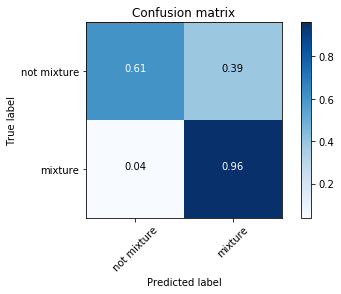

In [35]:
rf_mixture = RandomForestClassifier(n_estimators = 100, max_features = 'auto', n_jobs = -1, 
                                   bootstrap = True)
rf_mixture.fit(np.asarray(spectra_train_mixture), np.ravel(labels_train_df))
print(rf_mixture.score(np.asarray(spectra_test_mixture), np.ravel(labels_test_df)))
predictions = rf_mixture.predict(np.asarray(spectra_test_mixture))
cm_mixture = confusion_matrix(np.ravel(labels_test_df), predictions)
cm_normalized = normalize_cm(cm_mixture, list(np.ravel(labels_test_df)), 2)
plot_confusion_matrix(np.asarray(cm_normalized), ["not mixture", "mixture"])